## Gerando histograma com dados aleatórios

https://matplotlib.org/3.2.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

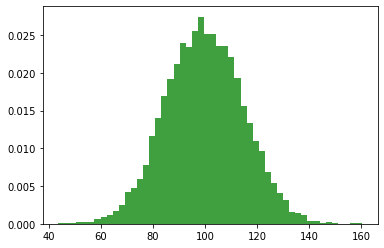

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

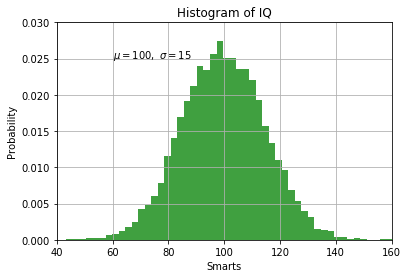

In [27]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

## Gerando números com distribuição arbitrária

http://code.activestate.com/recipes/576556-generating-random-numbers-with-arbitrary-distribut/

In [11]:
import pylab
import numpy

class GeneralRandom:
  """This class enables us to generate random numbers with an arbitrary 
  distribution."""
  
  def __init__(self, x = pylab.arange(-1.0, 1.0, .01), p = None, Nrl = 1000):
    """Initialize the lookup table (with default values if necessary)
    Inputs:
    x = random number values
    p = probability density profile at that point
    Nrl = number of reverse look up values between 0 and 1"""  
    if p == None:
      p = pylab.exp(-10*x**2.0)
    self.set_pdf(x, p, Nrl)
    
  def set_pdf(self, x, p, Nrl = 1000):
    """Generate the lookup tables. 
    x is the value of the random variate
    pdf is its probability density
    cdf is the cumulative pdf
    inversecdf is the inverse look up table
    
    """
    
    self.x = x
    self.pdf = p/p.sum() #normalize it
    self.cdf = self.pdf.cumsum()
    self.inversecdfbins = Nrl
    self.Nrl = Nrl
    y = pylab.arange(Nrl)/float(Nrl)
    delta = 1.0/Nrl
    self.inversecdf = pylab.zeros(Nrl)    
    self.inversecdf[0] = self.x[0]
    cdf_idx = 0
    for n in range(1,self.inversecdfbins):
      while self.cdf[cdf_idx] < y[n] and cdf_idx < Nrl:
        cdf_idx += 1
      self.inversecdf[n] = self.x[cdf_idx-1] + (self.x[cdf_idx] - self.x[cdf_idx-1]) * (y[n] - self.cdf[cdf_idx-1])/(self.cdf[cdf_idx] - self.cdf[cdf_idx-1]) 
      if cdf_idx >= Nrl:
        break
    self.delta_inversecdf = pylab.concatenate((pylab.diff(self.inversecdf), [0]))
              
  def random(self, N = 1000):
    """Give us N random numbers with the requested distribution"""

    idx_f = numpy.random.uniform(size = N, high = self.Nrl-1)
    idx = pylab.array([idx_f],'i')
    y = self.inversecdf[idx] + (idx_f - idx)*self.delta_inversecdf[idx]

    return y
  
  def plot_pdf(self):
    pylab.plot(self.x, self.pdf)
    
  def self_test(self, N = 1000):
    pylab.figure()
    #The cdf
    pylab.subplot(2,2,1)
    pylab.plot(self.x, self.cdf)
    #The inverse cdf
    pylab.subplot(2,2,2)
    y = pylab.arange(self.Nrl)/float(self.Nrl)
    pylab.plot(y, self.inversecdf)
    
    #The actual generated numbers
    pylab.subplot(2,2,3)
    y = self.random(N)
    p1, edges = pylab.histogram(y, bins = 50, 
                                range = (self.x.min(), self.x.max()), 
                                normed = True, new = True)
    x1 = 0.5*(edges[0:-1] + edges[1:])
    pylab.plot(x1, p1/p1.max())
    pylab.plot(self.x, self.pdf/self.pdf.max())

In [12]:
genrand = GeneralRandom()
genrand.random()

array([[-1.63686223e-01,  2.81259692e-01,  1.79505113e-01,
         3.09412170e-01,  3.69726739e-02, -1.75516423e-02,
        -4.95400009e-02, -5.57300352e-01, -1.07939894e-01,
        -5.66343698e-01,  1.57180512e-02,  4.36587050e-02,
        -4.58756351e-01,  3.02355135e-01,  1.83246040e-01,
        -5.04385078e-02,  2.14406669e-01, -2.30755885e-01,
         4.86898089e-02, -6.65179952e-02, -2.58249835e-02,
         1.26400237e-01,  1.36388207e-02,  6.21951311e-02,
        -1.98889298e-01,  5.43581144e-02,  1.70484273e-01,
        -1.34552065e-01,  8.54058143e-02,  7.28172612e-02,
        -1.77460469e-02,  2.18378226e-01,  1.14997913e-01,
        -7.50121232e-02, -9.28964781e-02,  1.35922808e-01,
         6.14989197e-02,  1.67997470e-02,  4.03818831e-01,
        -4.56806349e-01,  2.98159378e-01,  7.57375928e-02,
        -7.25824157e-02, -1.28354041e-01, -2.82950645e-01,
         4.16614804e-02, -4.46564340e-02,  5.94605537e-02,
         4.63376439e-02,  1.66237179e-02, -1.84104298e-0